## Import ALS Model code

In [1]:
import als_model_v2 as am

In [2]:
%matplotlib inline

In [2]:
import cPickle as pickle

## Open cleaned_df

In [3]:
with open ('24OCT17_pipelinerun/cleaned_df.pkl', 'rb') as f:
    cleaned_data = pickle.load(f)

## Instantiate Class Instances for ALS Model, Prep and Run for the Following:

#### For each of these features:
- SeriesID
- EventTypeID
- Venue (based on zip code)
- Total Average Fee
- Average Mileage

#### Run best fit model identified from exercise in Pipeline_v2-noTVS notebook on train+validate larger dataset; check rank metric on test set

#### Initial Prep:

In [5]:
als_model = am.implicit_als(cleaned_data, split_val=False)
#setting split_val to False results in the split being train/test instead of train/val/test
#80% of data is in train and 20% is in test

In [6]:
als_model.prep_full_df()

In [8]:
als_model.full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 925704 entries, 0 to 925703
Data columns (total 9 columns):
PersonID         925704 non-null int64
EventID          925704 non-null int64
Participated     925704 non-null int64
Event_Date       925704 non-null datetime64[ns]
SeriesID         925704 non-null float64
EventTypeID      925704 non-null int64
Total_Fee_Avg    925704 non-null int64
Miles2_Avg       925704 non-null int64
Venue_Zip        925704 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 63.6 MB


In [12]:
als_model.train_val_test_split()

TrainVal Size: 740563.0
Train Size: 592450.0
Validation Size: 148113.0
Test Size: 185141.0


## SeriesID

In [16]:
als_model.print_train_val_test_info("SeriesID")

participants in train: 10764
participants in validate: 10764
participants in test: 10764


participants in both train & validate: 10764
participants in both train & test: 10764


SeriesID in train: 5
SeriesID in validate: 4
SeriesID in test: 5


SeriesID in both train & validate: 4
SeriesID in both train & test: 5


In [17]:
als_model.create_participate_matrices("SeriesID")

In [22]:
als_model.fit_ALS(itemCol="SeriesID", rank=5, alpha=80, coldStartStrategy="drop")

In [23]:
trainval_predictions, trainval_rank, trainval_pop_rank, test_predictions, test_rank, test_pop_rank = als_model.predict_ALS(
    als_model.base_model, "SeriesID")

Trainval predictions includes 740563 valid values and 0 nan values
Test predictions includes 185141 valid values and 0 nan values
Trainval Model Rank = 1.53641759679 and Popular Rank = 26.3524346793
Test Model Rank = 4.8609993163 and Popular Rank = 10.7472903594


In [24]:
als_fit_model_series = als_model.base_model
als_trainvalpreds_pd_series = trainval_predictions
als_testpreds_pd_series = test_predictions

als_fit_model_series.save("26OCT17_finalfitmodels/als_fit_model_series")

with open ("26OCT17_finalfitmodels/als_trainvalpreds_pd_series.pkl", 'w') as f:
    pickle.dump(als_trainvalpreds_pd_series, f)
with open ('26OCT17_finalfitmodels/als_testpreds_pd_series.pkl', 'w') as f:
    pickle.dump(als_testpreds_pd_series, f)

In [25]:
#these only need to be saved once today:
als_trainval_df_pd = als_model.trainval
als_test_df_pd = als_model.test

In [26]:
with open ("26OCT17_finalfitmodels/als_trainval_df_pd.pkl", 'w') as f:
    pickle.dump(als_trainval_df_pd, f)
    
with open ("26OCT17_finalfitmodels/als_test_df_pd.pkl", 'w') as f:
    pickle.dump(als_test_df_pd, f)

## EventTypeID

In [27]:
als_model.print_train_val_test_info("EventTypeID")

participants in train: 10764
participants in validate: 10764
participants in test: 10764


participants in both train & validate: 10764
participants in both train & test: 10764


EventTypeID in train: 2
EventTypeID in validate: 1
EventTypeID in test: 2


EventTypeID in both train & validate: 1
EventTypeID in both train & test: 2


In [28]:
als_model.create_participate_matrices("EventTypeID")

In [29]:
als_model.fit_ALS(itemCol="EventTypeID", rank=30, alpha=80, coldStartStrategy="drop")

In [30]:
trainval_predictions, trainval_rank, trainval_pop_rank, test_predictions, test_rank, test_pop_rank = als_model.predict_ALS(
    als_model.base_model, "EventTypeID")

Trainval predictions includes 740563 valid values and 0 nan values
Test predictions includes 185141 valid values and 0 nan values
Trainval Model Rank = 0.00684473620581 and Popular Rank = 7.99064726841
Test Model Rank = 0.41742084036 and Popular Rank = 1.91100969766


In [31]:
als_fit_model_eventtype = als_model.base_model
als_trainvalpreds_pd_eventtype = trainval_predictions
als_testpreds_pd_eventtype = test_predictions

als_fit_model_eventtype.save("26OCT17_finalfitmodels/als_fit_model_eventtype")

with open ("26OCT17_finalfitmodels/als_trainvalpreds_pd_eventtype.pkl", 'w') as f:
    pickle.dump(als_trainvalpreds_pd_eventtype, f)
with open ("26OCT17_finalfitmodels/als_testpreds_pd_eventtype.pkl", 'w') as f:
    pickle.dump(als_testpreds_pd_eventtype, f)

## Venue (Based on Zipcode)

In [32]:
als_model.print_train_val_test_info("Venue_Zip")

participants in train: 10764
participants in validate: 10764
participants in test: 10764


participants in both train & validate: 10764
participants in both train & test: 10764


Venue_Zip in train: 24
Venue_Zip in validate: 10
Venue_Zip in test: 15


Venue_Zip in both train & validate: 8
Venue_Zip in both train & test: 15


In [33]:
als_model.create_participate_matrices("Venue_Zip")

In [34]:
als_model.fit_ALS(itemCol="Venue_Zip", rank=5, alpha=80, coldStartStrategy="drop")

In [35]:
trainval_predictions, trainval_rank, trainval_pop_rank, test_predictions, test_rank, test_pop_rank = als_model.predict_ALS(
    als_model.base_model, "Venue_Zip")

Trainval predictions includes 740563 valid values and 0 nan values
Test predictions includes 185141 valid values and 0 nan values
Trainval Model Rank = 6.5784112444 and Popular Rank = 23.2128174676
Test Model Rank = 13.3852376048 and Popular Rank = 31.7683970337


In [36]:
als_fit_model_zipcode = als_model.base_model
als_trainvalpreds_pd_zipcode = trainval_predictions
als_testpreds_pd_zipcode = test_predictions

als_fit_model_zipcode.save("26OCT17_finalfitmodels/als_fit_model_zipcode")

with open ("26OCT17_finalfitmodels/als_trainvalpreds_pd_zipcode.pkl", 'w') as f:
    pickle.dump(als_trainvalpreds_pd_zipcode, f)
with open ("26OCT17_finalfitmodels/als_testpreds_pd_zipcode.pkl", 'w') as f:
    pickle.dump(als_testpreds_pd_zipcode, f)

## Total Average Fee

In [37]:
als_model.print_train_val_test_info("Total_Fee_Avg")

participants in train: 10764
participants in validate: 10764
participants in test: 10764


participants in both train & validate: 10764
participants in both train & test: 10764


Total_Fee_Avg in train: 20
Total_Fee_Avg in validate: 11
Total_Fee_Avg in test: 12


Total_Fee_Avg in both train & validate: 8
Total_Fee_Avg in both train & test: 8


In [38]:
als_model.create_participate_matrices("Total_Fee_Avg")

In [39]:
als_model.fit_ALS(itemCol="Total_Fee_Avg", rank=5, alpha=80, coldStartStrategy="drop")

In [40]:
trainval_predictions, trainval_rank, trainval_pop_rank, test_predictions, test_rank, test_pop_rank = als_model.predict_ALS(
    als_model.base_model, "Total_Fee_Avg")

Trainval predictions includes 740563 valid values and 0 nan values
Test predictions includes 152849 valid values and 0 nan values
Trainval Model Rank = 6.02542849691 and Popular Rank = 26.5368429206
Test Model Rank = 14.875102889 and Popular Rank = 24.3897743898


In [41]:
als_fit_model_avgfee = als_model.base_model
als_trainvalpreds_pd_avgfee = trainval_predictions
als_testpreds_pd_avgfee = test_predictions

als_fit_model_avgfee.save("26OCT17_finalfitmodels/als_fit_model_avgfee")

with open ("26OCT17_finalfitmodels/als_trainvalpreds_pd_avgfee.pkl", 'w') as f:
    pickle.dump(als_trainvalpreds_pd_avgfee, f)

with open ("26OCT17_finalfitmodels/als_testpreds_pd_avgfee.pkl", 'w') as f:
    pickle.dump(als_testpreds_pd_avgfee, f)

## Average Mileage

In [42]:
als_model.print_train_val_test_info("Miles2_Avg")

participants in train: 10764
participants in validate: 10764
participants in test: 10764


participants in both train & validate: 10764
participants in both train & test: 10764


Miles2_Avg in train: 11
Miles2_Avg in validate: 5
Miles2_Avg in test: 10


Miles2_Avg in both train & validate: 5
Miles2_Avg in both train & test: 7


In [43]:
als_model.create_participate_matrices("Miles2_Avg")

In [44]:
als_model.fit_ALS(itemCol="Miles2_Avg", rank=5, alpha=80, coldStartStrategy="drop")

In [45]:
trainval_predictions, trainval_rank, trainval_pop_rank, test_predictions, test_rank, test_pop_rank = als_model.predict_ALS(
    als_model.base_model, "Miles2_Avg")

Trainval predictions includes 740563 valid values and 0 nan values
Test predictions includes 142085 valid values and 0 nan values
Trainval Model Rank = 2.24288129789 and Popular Rank = 23.1294536817
Test Model Rank = 10.1237046386 and Popular Rank = 31.4678216147


In [46]:
als_fit_model_avgmile = als_model.base_model
als_trainvalpreds_pd_avgmile = trainval_predictions
als_testpreds_pd_avgmile = test_predictions

als_fit_model_avgmile.save("26OCT17_finalfitmodels/als_fit_model_avgmile")

with open ("26OCT17_finalfitmodels/als_trainvalpreds_pd_avgmile.pkl", 'w') as f:
    pickle.dump(als_trainvalpreds_pd_avgmile, f)
with open ("26OCT17_finalfitmodels/als_testpreds_pd_avgmile.pkl", 'w') as f:
    pickle.dump(als_testpreds_pd_avgmile, f)

## Build Gradient Boost Ensemble Using ALS Models Predictions as Inputs to Determine Weights for Each

In [79]:
from ensemble_helper_functions import load_files, merge_data
import pandas as pd

#### Build X, y Train Matrices for GB Model; Split between Train and Validate

In [49]:
data_df = load_files('26OCT17_finalfitmodels/als_trainval_df_pd.pkl')
fee_preds = load_files('26OCT17_finalfitmodels/als_trainvalpreds_pd_avgfee.pkl')
mile_preds = load_files('26OCT17_finalfitmodels/als_trainvalpreds_pd_avgmile.pkl')
type_preds = load_files('26OCT17_finalfitmodels/als_trainvalpreds_pd_eventtype.pkl')
series_preds = load_files('26OCT17_finalfitmodels/als_trainvalpreds_pd_series.pkl')
zipcode_preds = load_files('26OCT17_finalfitmodels/als_trainvalpreds_pd_zipcode.pkl')

In [76]:
data_df['Event_Date'] = data_df['Event_Date'].astype('int64')//1e9

In [86]:
data_df['Event_Date'] = data_df['Event_Date'] * 1000000000

In [87]:
data_df.head()

,PersonID,EventID,Participated,Event_Date,SeriesID,EventTypeID,Total_Fee_Avg,Miles2_Avg,Venue_Zip
398267,10990,1000,0,1418428800000000000,4.0,2,39,8,98101
391096,3581,1000,0,1418428800000000000,4.0,2,39,8,98101
391095,3580,1000,0,1418428800000000000,4.0,2,39,8,98101
391094,3579,1000,0,1418428800000000000,4.0,2,39,8,98101
391093,3578,1000,0,1418428800000000000,4.0,2,39,8,98101


In [88]:
series_preds.head()

,PersonID,SeriesID,Participated,Event_Date,prediction
0,148,1.0,1,1446854400000000000,0.981499
1,148,1.0,1,1448064000000000000,0.981499
2,148,1.0,1,1449273600000000000,0.981499
3,148,1.0,0,1450483200000000000,0.981499
4,148,1.0,0,1451779200000000000,0.981499


In [89]:
predictions = [(series_preds, 'SeriesID'), (type_preds, 'EventTypeID'), 
               (zipcode_preds, 'Venue_Zip'), (fee_preds, 'Total_Fee_Avg'), 
               (mile_preds, 'Miles2_Avg')]

gb_train_data = data_df.copy()

for item in predictions:
    gb_train_data = merge_data(gb_train_data, item[0], item[1])

In [92]:
gb_train_data.sort_values(by='Event_Date', axis=0, ascending=True, inplace=True)

In [93]:
gb_train_data.reset_index(drop=True, inplace=True)

In [94]:
gb_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740563 entries, 0 to 740562
Data columns (total 9 columns):
PersonID                    740563 non-null int64
EventID                     740563 non-null int64
Participated                740563 non-null int64
Event_Date                  740563 non-null int64
SeriesID_prediction         740563 non-null float64
EventTypeID_prediction      740563 non-null float64
Venue_Zip_prediction        740563 non-null float64
Total_Fee_Avg_prediction    740563 non-null float64
Miles2_Avg_prediction       740563 non-null float64
dtypes: float64(5), int64(4)
memory usage: 50.9 MB


No NAN values to fill in since this is the predictions on the training data (no cold starts)

In [ ]:
#need to fill nan values for venue_zip_prediction and fee_prediction
#gb_data['venuezip_prediction'] = gb_data['venuezip_prediction'].apply(
#                            lambda x: gb_data['venuezip_prediction'].mean() if pd.isnull(x) else x)
#need to fill nan values for venue_zip_prediction and fee_prediction
#gb_data['fee_prediction'] = gb_data['fee_prediction'].apply(
#                            lambda x: gb_data['fee_prediction'].mean() if pd.isnull(x) else x)

In [100]:
len(gb_train_data)*.8, len(gb_train_data)*.2

(592450.4, 148112.6)

Split data on first 592450 records for train (sorted by event_date as timestamp) and last 148113 records for test

In [102]:
X_gb_train = gb_train_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].iloc[:592450].copy()

In [103]:
y_gb_train = gb_train_data['Participated'].iloc[:592450].copy()

In [104]:
len(X_gb_train), len(y_gb_train)

(592450, 592450)

In [105]:
X_gb_val = gb_train_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].iloc[592450:].copy()

In [106]:
y_gb_val = gb_train_data['Participated'].iloc[592450:].copy()

In [108]:
len(X_gb_val), len(y_gb_val)

(148113, 148113)

In [109]:
with open('26OCT17_finalfitmodels/gb_train_data.pkl', 'w') as f:
    pickle.dump(gb_train_data, f)

#### Build X, y Test Matrices for GB Model

In [110]:
test_data_df = load_files('26OCT17_finalfitmodels/als_test_df_pd.pkl')
test_fee_preds = load_files('26OCT17_finalfitmodels/als_testpreds_pd_avgfee.pkl')
test_mile_preds = load_files('26OCT17_finalfitmodels/als_testpreds_pd_avgmile.pkl')
test_type_preds = load_files('26OCT17_finalfitmodels/als_testpreds_pd_eventtype.pkl')
test_series_preds = load_files('26OCT17_finalfitmodels/als_testpreds_pd_series.pkl')
test_zipcode_preds = load_files('26OCT17_finalfitmodels/als_testpreds_pd_zipcode.pkl')

In [119]:
test_data_df['Event_Date'] = test_data_df['Event_Date'].astype('int64')//1e9

In [120]:
test_data_df['Event_Date'] = test_data_df['Event_Date'] * 1000000000

In [130]:
test_predictions = [(test_series_preds, 'SeriesID'), (test_type_preds, 'EventTypeID'), 
               (test_zipcode_preds, 'Venue_Zip'), (test_fee_preds, 'Total_Fee_Avg'), 
               (test_mile_preds, 'Miles2_Avg')]

gb_test_data = test_data_df.copy()

for item in test_predictions:
    gb_test_data = merge_data(gb_test_data, item[0], item[1])

In [131]:
gb_test_data.sort_values(by='Event_Date', axis=0, ascending=True, inplace=True)

In [132]:
gb_test_data.reset_index(drop=True, inplace=True)

In [134]:
#need to fill nan values for and Fee and Mile Predictions (caused by cold starts during ALS modeling)
gb_test_data['Total_Fee_Avg_prediction'] = gb_test_data['Total_Fee_Avg_prediction'].apply(
                            lambda x: gb_test_data['Total_Fee_Avg_prediction'].mean() if pd.isnull(x) else x)
#need to fill nan values for venue_zip_prediction and fee_prediction
gb_test_data['Miles2_Avg_prediction'] = gb_test_data['Miles2_Avg_prediction'].apply(
                            lambda x: gb_test_data['Miles2_Avg_prediction'].mean() if pd.isnull(x) else x)

In [135]:
gb_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185141 entries, 0 to 185140
Data columns (total 9 columns):
PersonID                    185141 non-null int64
EventID                     185141 non-null int64
Participated                185141 non-null int64
Event_Date                  185141 non-null int64
SeriesID_prediction         185141 non-null float64
EventTypeID_prediction      185141 non-null float64
Venue_Zip_prediction        185141 non-null float64
Total_Fee_Avg_prediction    185141 non-null float64
Miles2_Avg_prediction       185141 non-null float64
dtypes: float64(5), int64(4)
memory usage: 12.7 MB


In [138]:
X_gb_test = gb_test_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].copy()

In [139]:
y_gb_test = gb_test_data['Participated'].copy()

In [141]:
len(X_gb_test), len(y_gb_test)

(185141, 185141)

In [142]:
with open('26OCT17_finalfitmodels/gb_test_data.pkl', 'w') as f:
    pickle.dump(gb_test_data, f)

## Train Gradient Boosted Regressor out of the box using prepared data

In [1]:
import cPickle as pickle

In [3]:
with open('26OCT17_finalfitmodels/gb_train_data.pkl', 'rb') as f:
    gb_train_data = pickle.load(f)
with open('26OCT17_finalfitmodels/gb_test_data.pkl', 'rb') as f:
    gb_test_data = pickle.load(f)

In [4]:
X_gb_train = gb_train_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].iloc[:592450].copy()

In [5]:
y_gb_train = gb_train_data['Participated'].iloc[:592450].copy()

In [6]:
len(X_gb_train), len(y_gb_train)

(592450, 592450)

In [7]:
X_gb_val = gb_train_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].iloc[592450:].copy()

In [8]:
y_gb_val = gb_train_data['Participated'].iloc[592450:].copy()

In [9]:
len(X_gb_val), len(y_gb_val)

(148113, 148113)

In [10]:
X_gb_test = gb_test_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']].copy()

In [11]:
y_gb_test = gb_test_data['Participated'].copy()

In [12]:
len(X_gb_test), len(y_gb_test)

(185141, 185141)

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

In [14]:
gb_model = GradientBoostingRegressor()

In [15]:
gb_model.fit(X_gb_train, y_gb_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [16]:
gb_model.score(X_gb_val, y_gb_val) #this uses r^2 for scoring....not helpful in my situation

0.50339517816543178

In [17]:
import rank_eval

The df needs to include columns for user, item, actual outcome, and predicted outcome
    user, item, actual, prediction - strings indicating the name of each column in
    the predictions file for use in the function

In [18]:
gb_valpreds = gb_model.predict(X_gb_val)

In [19]:
len(gb_valpreds)

148113

In [20]:
len(y_gb_val)

148113

In [22]:
import pandas as pd
rankeval_valpreds_df = pd.DataFrame({'PersonID': gb_train_data['PersonID'].iloc[592450:], 'EventID': 
                                      gb_train_data['EventID'].iloc[592450:], 'Participated': y_gb_val.values, 
                                      'prediction': gb_valpreds})

In [23]:
rankeval_valpreds_df.head()

,EventID,Participated,PersonID,prediction
592450,53,0,426,-0.001113
592451,53,0,427,-0.003255
592452,53,0,428,0.014946
592453,53,0,429,0.014946
592454,53,0,430,0.000141


In [24]:
rank_processing = rank_eval.RankEval(rankeval_valpreds_df, 'PersonID', 'EventID', 'Participated', 'prediction')

In [25]:
rank_processing.calc_test_rank()

10.608256886757683

In [26]:
rank_processing.calc_popular_rank()

36.005991800693678

In [27]:
gb_model.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

In [28]:
zip(gb_model.feature_importances_, X_gb_train.columns.values)

[(0.17383546240891737, 'SeriesID_prediction'),
 (0.038370881059628832, 'EventTypeID_prediction'),
 (0.38350505599236889, 'Venue_Zip_prediction'),
 (0.26136761331297031, 'Total_Fee_Avg_prediction'),
 (0.14292098722611465, 'Miles2_Avg_prediction')]

## Train Gradient Boosted Regressor with some Params Tweaked:

In [161]:
gb_model_v2 = GradientBoostingRegressor(loss='ls', learning_rate=.01, n_estimators=1000, subsample=0.5, max_depth=10)

In [162]:
gb_model_v2.fit(X_gb_train, y_gb_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=10,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=0.5, verbose=0,
             warm_start=False)

In [163]:
gb_model_v2.score(X_gb_val, y_gb_val) #this uses r^2 for scoring....not helpful in my situation

0.54893401872982728

The df needs to include columns for user, item, actual outcome, and predicted outcome
    user, item, actual, prediction - strings indicating the name of each column in
    the predictions file for use in the function

In [164]:
gb_valpreds_v2 = gb_model_v2.predict(X_gb_val)

In [165]:
len(gb_valpreds_v2)

148113

In [166]:
len(y_gb_val)

148113

In [167]:
rankeval_valpreds_df_v2 = pd.DataFrame({'PersonID': gb_train_data['PersonID'].iloc[592450:], 'EventID': 
                                      gb_train_data['EventID'].iloc[592450:], 'Participated': y_gb_val.values, 
                                      'prediction': gb_valpreds_v2})

In [168]:
rankeval_valpreds_df_v2.head()

,EventID,Participated,PersonID,prediction
592450,53,0,426,1.647883e-05
592451,53,0,427,-2.141425e-04
592452,53,0,428,9.218641e-04
592453,53,0,429,9.218641e-04
592454,53,0,430,6.074579e-07


In [169]:
rank_processing_v2 = rank_eval.RankEval(rankeval_valpreds_df_v2, 'PersonID', 'EventID', 'Participated', 'prediction')

In [170]:
rank_processing_v2.calc_test_rank()

13.21503460962106

In [171]:
rank_processing_v2.calc_popular_rank()

36.005991800693678

In [172]:
gb_model_v2.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1000,
 'presort': 'auto',
 'random_state': None,
 'subsample': 0.5,
 'verbose': 0,
 'warm_start': False}

In [173]:
zip(gb_model_v2.feature_importances_, X_gb_train.columns.values)

[(0.17878788265969475, 'SeriesID_prediction'),
 (0.071173449515895104, 'EventTypeID_prediction'),
 (0.3104463373768348, 'Venue_Zip_prediction'),
 (0.26937640589463835, 'Total_Fee_Avg_prediction'),
 (0.17021592455293708, 'Miles2_Avg_prediction')]

## v3 Gradient Boost Fit

In [29]:
gb_model_v3 = GradientBoostingRegressor(loss='ls', learning_rate=.1, n_estimators=500, subsample=0.5, max_depth=5)

In [30]:
gb_model_v3.fit(X_gb_train, y_gb_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False)

In [31]:
gb_model_v3.score(X_gb_val, y_gb_val) #this uses r^2 for scoring....not helpful in my situation

0.55673198895920151

The df needs to include columns for user, item, actual outcome, and predicted outcome
    user, item, actual, prediction - strings indicating the name of each column in
    the predictions file for use in the function

In [32]:
gb_valpreds_v3 = gb_model_v3.predict(X_gb_val)

In [33]:
len(gb_valpreds_v3)

148113

In [34]:
len(y_gb_val)

148113

In [36]:
rankeval_valpreds_df_v3 = pd.DataFrame({'PersonID': gb_train_data['PersonID'].iloc[592450:], 'EventID': 
                                      gb_train_data['EventID'].iloc[592450:], 'Participated': y_gb_val.values, 
                                      'prediction': gb_valpreds_v3})

In [37]:
rankeval_valpreds_df_v3.head()

,EventID,Participated,PersonID,prediction
592450,53,0,426,-0.001380
592451,53,0,427,-0.000540
592452,53,0,428,-0.006867
592453,53,0,429,-0.006867
592454,53,0,430,-0.000083


In [38]:
rank_processing_v3 = rank_eval.RankEval(rankeval_valpreds_df_v3, 'PersonID', 'EventID', 'Participated', 'prediction')

In [39]:
rank_processing_v3.calc_test_rank()

12.844999456893197

In [40]:
rank_processing_v3.calc_popular_rank()

36.005991800693678

In [41]:
gb_model_v3.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'presort': 'auto',
 'random_state': None,
 'subsample': 0.5,
 'verbose': 0,
 'warm_start': False}

In [42]:
zip(gb_model_v3.feature_importances_, X_gb_train.columns.values)

[(0.15430188615509788, 'SeriesID_prediction'),
 (0.066959413246221539, 'EventTypeID_prediction'),
 (0.38575525941974143, 'Venue_Zip_prediction'),
 (0.23845142532476507, 'Total_Fee_Avg_prediction'),
 (0.15453201585417414, 'Miles2_Avg_prediction')]

## v5 Gradient Boost Fit - final pick

In [108]:
gb_model_v4 = GradientBoostingRegressor(loss='ls', learning_rate=.01, n_estimators=100, subsample=0.5, max_depth=3)

In [109]:
gb_model_v4.fit(X_gb_train, y_gb_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False)

In [110]:
gb_model_v4.score(X_gb_val, y_gb_val) #this uses r^2 for scoring....not helpful in my situation

0.36161776468476214

The df needs to include columns for user, item, actual outcome, and predicted outcome
    user, item, actual, prediction - strings indicating the name of each column in
    the predictions file for use in the function

In [111]:
gb_valpreds_v4 = gb_model_v4.predict(X_gb_val)

In [112]:
len(gb_valpreds_v4)

148113

In [113]:
len(y_gb_val)

148113

In [114]:
rankeval_valpreds_df_v4 = pd.DataFrame({'PersonID': gb_train_data['PersonID'].iloc[592450:], 'EventID': 
                                      gb_train_data['EventID'].iloc[592450:], 'Participated': y_gb_val.values, 
                                      'prediction': gb_valpreds_v4})

In [115]:
rankeval_valpreds_df_v4.head()

,EventID,Participated,PersonID,prediction
592450,53,0,426,0.006887
592451,53,0,427,0.006887
592452,53,0,428,0.008846
592453,53,0,429,0.008846
592454,53,0,430,0.006887


In [116]:
rank_processing_v4 = rank_eval.RankEval(rankeval_valpreds_df_v4, 'PersonID', 'EventID', 'Participated', 'prediction')

In [117]:
rank_processing_v4.calc_test_rank()

7.6624270293472847

In [118]:
rank_processing_v4.calc_popular_rank()

36.005991800693678

In [119]:
gb_model_v4.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 0.5,
 'verbose': 0,
 'warm_start': False}

In [120]:
zip(gb_model_v4.feature_importances_, X_gb_train.columns.values)

[(0.063476210592455923, 'SeriesID_prediction'),
 (0.013552982432258434, 'EventTypeID_prediction'),
 (0.35382244573137867, 'Venue_Zip_prediction'),
 (0.42651626602072878, 'Total_Fee_Avg_prediction'),
 (0.14263209522317813, 'Miles2_Avg_prediction')]

In [123]:
with open ('26OCT17_finalfitmodels/gb_model_trainfit', 'w') as f:
    pickle.dump(gb_model_v4, f)
with open ('26OCT17_finalfitmodels/gb_valpreds_trainfit', 'w') as f:
    pickle.dump(gb_valpreds_v4, f)

## Refit selected model with train+val data:

In [124]:
X_gb_trainval = gb_train_data[['SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 'Total_Fee_Avg_prediction', 
                      'Miles2_Avg_prediction']]

In [125]:
y_gb_trainval = gb_train_data['Participated']

In [209]:
gb_model_final = GradientBoostingRegressor(loss='ls', learning_rate=.01, n_estimators=100, subsample=0.5, max_depth=3)

In [210]:
gb_model_final.fit(X_gb_trainval, y_gb_trainval)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=0.5, verbose=0, warm_start=False)

In [211]:
gb_model_final.score(X_gb_test, y_gb_test) #this uses r^2 for scoring....not helpful in my situation

-0.024690833563853154

The df needs to include columns for user, item, actual outcome, and predicted outcome
    user, item, actual, prediction - strings indicating the name of each column in
    the predictions file for use in the function

In [212]:
gb_testpreds_final = gb_model_final.predict(X_gb_test)

In [213]:
len(gb_testpreds_final)

185141

In [214]:
len(y_gb_test)

185141

In [215]:
len(gb_test_data)

185141

In [216]:
rankeval_testpreds_df_final = pd.DataFrame({'PersonID': gb_test_data['PersonID'], 'EventID': 
                                      gb_test_data['EventID'], 'Participated': y_gb_test.values, 
                                      'prediction': gb_testpreds_final})

In [217]:
rankeval_testpreds_df_final.head()

,EventID,Participated,PersonID,prediction
0,67,0,4304,0.006862
1,67,0,2921,0.307445
2,67,0,2920,0.006862
3,67,0,2919,0.006862
4,67,0,2917,0.008913


In [218]:
rank_processing_final = rank_eval.RankEval(rankeval_testpreds_df_final, 'PersonID', 'EventID', 'Participated', 'prediction')

In [219]:
rank_processing_final.calc_test_rank()

18.517767702087443

In [220]:
rank_processing_final.calc_popular_rank()

30.302021930658537

In [221]:
gb_trainvalpreds_final = gb_model_final.predict(X_gb_trainval)

In [222]:
len(gb_trainvalpreds_final)

740563

In [223]:
len(y_gb_trainval)

740563

In [224]:
len(gb_train_data)

740563

In [225]:
rankeval_trainvalpreds_df_final = pd.DataFrame({'PersonID': gb_train_data['PersonID'], 'EventID': 
                                      gb_train_data['EventID'], 'Participated': y_gb_trainval.values, 
                                      'prediction': gb_trainvalpreds_final})

In [226]:
rank_processing_final_train = rank_eval.RankEval(rankeval_trainvalpreds_df_final, 'PersonID', 'EventID', 'Participated', 'prediction')

In [227]:
rank_processing_final_train.calc_test_rank()

7.2645672521985833

In [228]:
rank_processing_final_train.calc_popular_rank()

33.199722882026641

In [229]:
gb_model_final.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 0.5,
 'verbose': 0,
 'warm_start': False}

In [230]:
zip(gb_model_final.feature_importances_, X_gb_train.columns.values)

[(0.077052009142721825, 'SeriesID_prediction'),
 (0.011092818055114749, 'EventTypeID_prediction'),
 (0.34520211697421244, 'Venue_Zip_prediction'),
 (0.45708994893045229, 'Total_Fee_Avg_prediction'),
 (0.10956310689749892, 'Miles2_Avg_prediction')]

In [231]:
with open ('26OCT17_finalfitmodels/gb_model_final', 'w') as f:
    pickle.dump(gb_model_final, f)
with open ('26OCT17_finalfitmodels/gb_testpreds_final', 'w') as f:
    pickle.dump(gb_testpreds_final, f)

## Gather Info on Top Events and Likely Participants from Top 5 Recommendations Info for Each Person

In [7]:
import pandas as pd
with open ('26OCT17_finalfitmodels/gb_testpreds_final', 'rb') as f:
    gb_testpreds_final = pickle.load(f)
with open ('26OCT17_finalfitmodels/gb_test_data.pkl', 'rb') as f:
    gb_test_data = pickle.load(f)
with open ('26OCT17_finalfitmodels/gb_train_data.pkl', 'rb') as f:
    gb_train_data = pickle.load(f)

In [22]:
with open ('24OCT17_pipelinerun/cleaned_df.pkl', 'rb') as f:
    cleaned_data = pickle.load(f)

In [8]:
rankeval_testpreds_df_final = pd.DataFrame({'PersonID': gb_test_data['PersonID'], 'EventID': 
                                      gb_test_data['EventID'], 'Participated': gb_test_data['Participated'], 
                                      'prediction': gb_testpreds_final})

In [9]:
from collections import defaultdict

D_topeventcounts = defaultdict(int)
D_likelyusers = defaultdict(list)

for person in rankeval_testpreds_df_final['PersonID'].unique():
    temp_df = rankeval_testpreds_df_final[rankeval_testpreds_df_final["PersonID"] == person].copy()
    temp_df.sort_values('prediction', ascending=False, inplace=True)
    temp_df = temp_df.iloc[:5]
    
    for event in temp_df['EventID'].values:
        D_topeventcounts[event] += 1
        D_likelyusers[event].append(person)

In [10]:
D_topeventcounts
#Number of instances that an event in the test dataset shows up in a person's top 10 recommendations

defaultdict(int,
            {67: 1478,
             68: 8682,
             69: 1731,
             70: 1713,
             71: 1370,
             72: 2304,
             73: 386,
             74: 1037,
             75: 73,
             76: 1340,
             77: 8170,
             78: 1854,
             79: 1559,
             80: 5056,
             81: 7064,
             82: 8109,
             1018: 433,
             4003: 1461})

In [11]:
topevents_df = pd.DataFrame({'EventID': D_topeventcounts.keys(), 'Count in Top 5s': D_topeventcounts.values()})

In [12]:
topevents_df = pd.merge(topevents_df, cleaned_data, on='EventID')

In [13]:
topevents_df = topevents_df[['Count in Top 5s', 'EventID', 'Total fee', 'Event_Name', 'Event_Date', 'MergeoEvent', 
                            'EventType', 'SeriesID', 'Miles2', 'Venue_Zip']]

In [14]:
D_avgfees = defaultdict(float)

idx = topevents_df.groupby('EventID')['Total fee'].mean().index.values
vals = topevents_df.groupby('EventID')['Total fee'].mean().values

for idx, val in zip(idx, vals):
    D_avgfees[idx] = round(val, 2)

In [15]:
D_avgmiles = defaultdict(float)

idx = topevents_df.groupby('EventID')['Miles2'].mean().index.values
vals = topevents_df.groupby('EventID')['Miles2'].mean().values

for idx, val in zip(idx, vals):
    D_avgmiles[idx] = round(val, 2)

In [16]:
topevents_df['Total fee'] = topevents_df['EventID'].apply(lambda x: D_avgfees[x])
topevents_df['Miles2'] = topevents_df['EventID'].apply(lambda x: D_avgmiles[x])

In [17]:
topevents_df.drop_duplicates(subset='EventID', inplace=True)

In [18]:
topevents_df.sort_values(by='Count in Top 5s', ascending=False, inplace=True)
topevents_df.reset_index(drop=True, inplace = True)
topevents_df

#Not much trend showing up in top recommended events with regard to fee, miles, venue zips, event date....a little series
#try changing miles ALS to # of distance options at race rather than average mileage for race

,Count in Top 5s,EventID,Total fee,Event_Name,Event_Date,MergeoEvent,EventType,SeriesID,Miles2,Venue_Zip
0,8682,68,42.02,Fort Ebey Kettles Trail Run,2017-02-25,True,Trail Run,2.0,9.89,98239
1,8170,77,29.04,Ravenna Run the Ravine,2017-06-06,True,Trail Run,3.0,4.24,98105
2,8109,82,38.58,Summer Eddy,2017-08-08,True,Trail Run,3.0,5.51,98028
3,7064,81,31.48,Seward Sizzler,2017-07-25,True,Trail Run,3.0,5.20,98118
4,5056,80,38.98,Pie High Trail Run,2017-07-22,True,Trail Run,2.0,8.18,98290
5,2304,72,41.62,Spring Eagle Trail Run,2017-04-29,True,Trail Run,2.0,10.97,98074
6,1854,78,37.86,Sunshine Salutation,2017-06-20,True,Trail Run,3.0,6.74,98053
7,1731,69,45.45,Spring Run for Fun,2017-03-11,True,Trail Run,2.0,12.73,98053
8,1713,70,39.10,Cedar Mountain Trail Run,2017-03-25,True,Trail Run,0.0,7.06,98038
9,1559,79,30.55,Carkeek Warmer,2017-07-11,True,Trail Run,3.0,4.66,-1


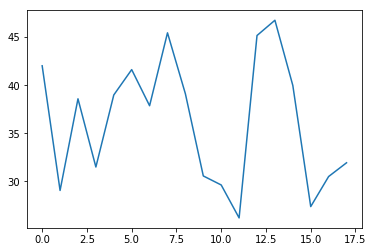

In [189]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(topevents_df.index.values, topevents_df['Total fee'])

In [98]:
D_likelyusers[81][:10]
#PersonIDs for which the given EventID is in their Top 10 recommendations

[4304, 2921, 2920, 2919, 2916, 2913, 2888, 2863, 2861, 2859]

In [99]:
likelyusers_event81_df = pd.DataFrame({'EventID': 81, 'PersonID': D_likelyusers[81]})
likelyusers_event81_df.head()

,EventID,PersonID
0,81,4304
1,81,2921
2,81,2920
3,81,2919
4,81,2916


In [102]:
likelyusers_event81_df = pd.merge(likelyusers_event81_df, cleaned_data, on='PersonID')

In [103]:
likelyusers_event81_df = likelyusers_event81_df[['PersonID', 'Gender', 'Age2', 'Zip Code', 'EventID_x']]

In [104]:
likelyusers_event81_df.drop_duplicates(subset='PersonID', inplace=True)

In [105]:
likelyusers_event81_df.head()

,PersonID,Gender,Age2,Zip Code,EventID_x
0,4304,Male,17.0,98112,81
1,2921,Female,32.0,98146,81
5,2920,Male,24.0,98270,81
7,2919,Male,38.0,98177,81
8,2916,Female,36.0,98109,81


In [106]:
tot_recs = float(len(likelyusers_event81_df))
print('Number of Top 5 Recommendations Users for Event 81, Seward Sizzler: {}'.format(tot_recs))

Number of Top 5 Recommendations Users for Event 81, Seward Sizzler: 7064.0


In [107]:
print('Percent Male/Female Reccomended for Race 81, Seward Sizzler: {}, {}'.format(
    (likelyusers_event81_df[likelyusers_event81_df['Gender'] == 'Male'].count()['PersonID'])/tot_recs, 
    (likelyusers_event81_df[likelyusers_event81_df['Gender'] == 'Female'].count()['PersonID'])/tot_recs))

Percent Male/Female Reccomended for Race 81, Seward Sizzler: 0.421998867497, 0.575594563986


In [108]:
tot_males = float(cleaned_data[cleaned_data['Gender'] == 'Male'].drop_duplicates('PersonID').count()['PersonID'])
tot_males

4530.0

In [109]:
tot_females = float(cleaned_data[cleaned_data['Gender'] == 'Female'].drop_duplicates('PersonID').count()['PersonID'])
tot_females

6217.0

In [110]:
print('Percent Male/Female in Total Population: {}, {}'.format(
    (tot_males / (tot_males+tot_females)), (tot_females / (tot_males+tot_females))))

Percent Male/Female in Total Population: 0.421512980367, 0.578487019633


In [111]:
print('Average Age Reccomended for Race 81, Spring Run for Fun: {}'.format(
    round(likelyusers_event81_df['Age2'].mean(), 1)))

Average Age Reccomended for Race 81, Spring Run for Fun: 35.4


In [112]:
print('Average Age in Total Population: {}'.format(
    round(cleaned_data['Age2'].mean(), 1)))

Average Age in Total Population: 37.4


## Ensemble rank score is worse than each individual ALS model's score from the test set:

* Ensemble: 7.2645672521985833 on Train, 18.517767702087443 on Test


* Series ALS: 1.53641759679 on Train, 4.8609993163 on Test
* Event Type ALS: 0.00684473620581 on Train, 0.41742084036 on Test
* Venue ALS: 6.5784112444 on Train, 13.3852376048 on Test
* Avg Fee ALS: 6.02542849691 on Train, 14.875102889 on Test
* Avg Miles ALS: 2.24288129789 on Train, 10.1237046386 on Test

#### Try a naive approach to ensembling, just averaging the input predictions from each ALS for each person to compare that score to the GB score

#### On Train Data:

In [10]:
gb_train_data.head()

,PersonID,EventID,Participated,Event_Date,SeriesID_prediction,EventTypeID_prediction,Venue_Zip_prediction,Total_Fee_Avg_prediction,Miles2_Avg_prediction
0,10990,1000,0,1418428800000000000,0.970276,0.997523,0.839683,0.955253,0.966064
1,10989,1000,0,1418428800000000000,0.970276,0.997523,0.839683,0.955253,0.966064
2,5540,1000,1,1418428800000000000,0.970276,0.997523,0.923138,0.955253,0.966064
3,10988,1000,0,1418428800000000000,0.970276,0.997523,0.839683,0.955253,0.966064
4,10987,1000,0,1418428800000000000,0.970276,0.997523,0.839683,0.955253,0.966064


In [76]:
naive_train_ensemble = gb_train_data.copy()

In [77]:
naive_train_ensemble['prediction'] = (naive_train_ensemble['SeriesID_prediction'] +
                                      naive_train_ensemble['EventTypeID_prediction'] +
                                      naive_train_ensemble['Venue_Zip_prediction'] +
                                      naive_train_ensemble['Total_Fee_Avg_prediction'] +
                                      naive_train_ensemble['Miles2_Avg_prediction']) / 5.

In [78]:
naive_train_ensemble.drop(['Event_Date', 'SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 
                          'Total_Fee_Avg_prediction', 'Miles2_Avg_prediction'], axis=1, inplace=True)

In [79]:
naive_train_ensemble.head()

,PersonID,EventID,Participated,prediction
0,10990,1000,0,0.945760
1,10989,1000,0,0.945760
2,5540,1000,1,0.962451
3,10988,1000,0,0.945760
4,10987,1000,0,0.945760


In [80]:
import rank_eval

In [81]:
rank_processing_naive_train = rank_eval.RankEval(naive_train_ensemble, 'PersonID', 'EventID', 'Participated', 'prediction')

In [82]:
rank_processing_naive_train.calc_test_rank()

1.9571504005541509

In [83]:
rank_processing_naive_train.calc_popular_rank()

33.199722882026641

#### On Test Data:

In [84]:
gb_test_data.head()

,PersonID,EventID,Participated,Event_Date,SeriesID_prediction,EventTypeID_prediction,Venue_Zip_prediction,Total_Fee_Avg_prediction,Miles2_Avg_prediction
0,4304,67,0,1486252800000000000,0.024100,0.029454,0.000000,0.024471,0.259074
1,2921,67,0,1486252800000000000,0.953696,0.999630,0.906229,0.893079,0.997684
2,2920,67,0,1486252800000000000,0.945487,0.996544,0.268220,0.161676,0.290000
3,2919,67,0,1486252800000000000,0.929485,0.990440,0.554163,0.056878,0.130596
4,2917,67,0,1486252800000000000,0.945487,0.996544,0.926114,0.299666,0.779473


In [85]:
naive_test_ensemble = gb_test_data.copy()

In [86]:
naive_test_ensemble['prediction'] = (naive_test_ensemble['SeriesID_prediction'] +
                                     naive_test_ensemble['EventTypeID_prediction'] +
                                      naive_test_ensemble['Venue_Zip_prediction'] +
                                      naive_test_ensemble['Total_Fee_Avg_prediction'] +
                                      naive_test_ensemble['Miles2_Avg_prediction']) / 4.

In [87]:
naive_test_ensemble.drop(['Event_Date', 'SeriesID_prediction', 'EventTypeID_prediction', 'Venue_Zip_prediction', 
                          'Total_Fee_Avg_prediction', 'Miles2_Avg_prediction'], axis=1, inplace=True)

In [88]:
naive_test_ensemble.head()

,PersonID,EventID,Participated,prediction
0,4304,67,0,0.084275
1,2921,67,0,1.187580
2,2920,67,0,0.665482
3,2919,67,0,0.665391
4,2917,67,0,0.986821


In [89]:
rank_processing_naive_test = rank_eval.RankEval(naive_test_ensemble, 'PersonID', 'EventID', 'Participated', 'prediction')

In [90]:
rank_processing_naive_test.calc_test_rank()

50.741111790053999

In [91]:
rank_processing_naive_test.calc_popular_rank()

30.302021930658537